# Exercise: Clustering

Pakai Mall_Customers.csv sebagai data untuk clustering K-means model.
* drop CustomerID dan ubah feature gender menjadi 0 untuk pria dan 1 untuk wanita
* carilah nilai K terbaik untuk membentuk cluster.
* coba visualisasikan data hasil clustering kalian dengan kombinasi feature-feature yang ada. (ex: Gender& Age; Gender& Annual Income, Age & Annual income, dst)


In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

In [2]:
df_raw = pd.read_csv('data/Mall_Customers.csv')
df_raw

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df_raw.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df = df_raw.copy()

In [5]:
df['Gender_dummy'] = np.where(df['Gender']=="Male",1,0)
df.drop(columns=['Gender','CustomerID'], inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_dummy
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


### Elbow Method

In [6]:
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(df) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings] # lempar random centroid

In [7]:
# within sumsq
D_k = [cdist(df, cent, 'euclidean') for cent in centroids] # menghitung jarak titik2 ke centroid
cIdx = [np.argmin(D, axis=1) for D in D_k] # titiknya masuk ke cluster apa
dist = [np.min(D, axis=1) for D in D_k] # centroid pindah
avgWithinSS = [sum(d)/df.shape[0] for d in dist] # error distancenya brp

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


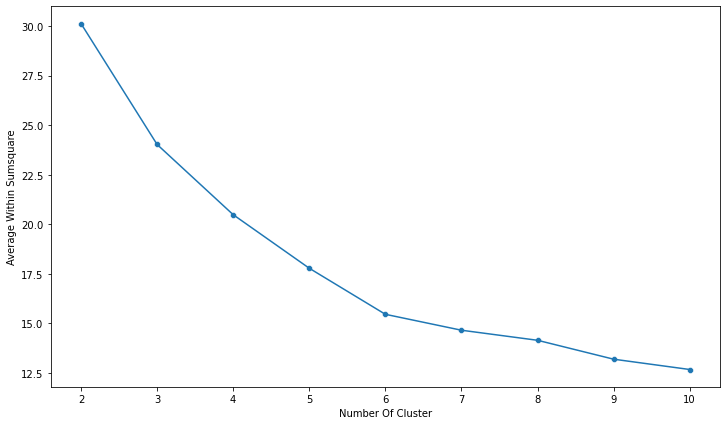

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

### Silhouette Score

In [9]:
# from sklearn.metrics import silhouette_score
# kmeans = KMeans(n_clusters = 2)
# kmeans.fit(df)

In [10]:
# labels = kmeans.labels_
# silhouette_score(df, labels, metric = 'euclidean')

In [11]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(df, labels, metric = 'euclidean'))

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


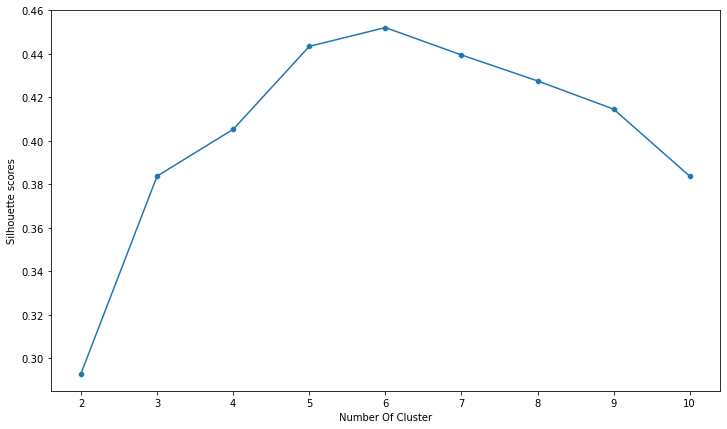

In [12]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette scores')
plt.show()

In [13]:
k_means = KMeans(n_clusters=6)
k_means.fit(df)

df['cluster'] = k_means.labels_
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_dummy,cluster
0,19,15,39,1,4
1,21,15,81,1,5
2,20,16,6,0,4
3,23,16,77,0,5
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,3
197,32,126,74,1,2
198,32,137,18,1,3


Text(0, 0.5, 'Spending Score (1-100)')

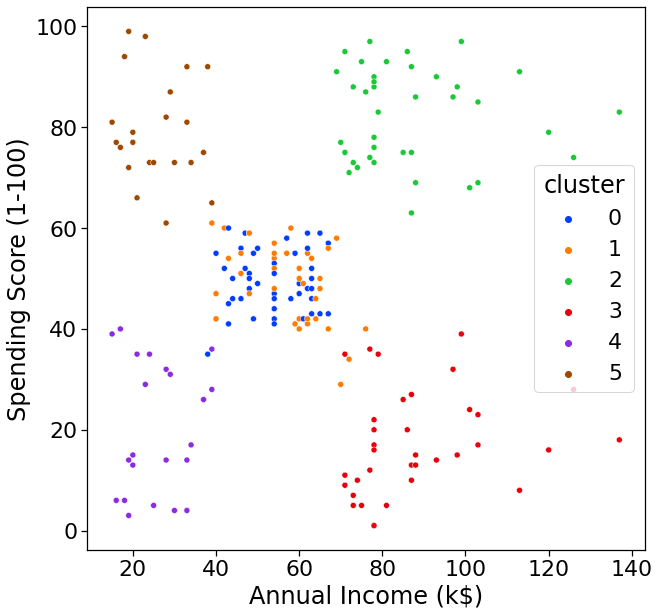

In [14]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Annual Income (k$)', 
    y = 'Spending Score (1-100)', 
    hue = 'cluster',
    data = df,
    palette = 'bright')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Annual Income (k$)')

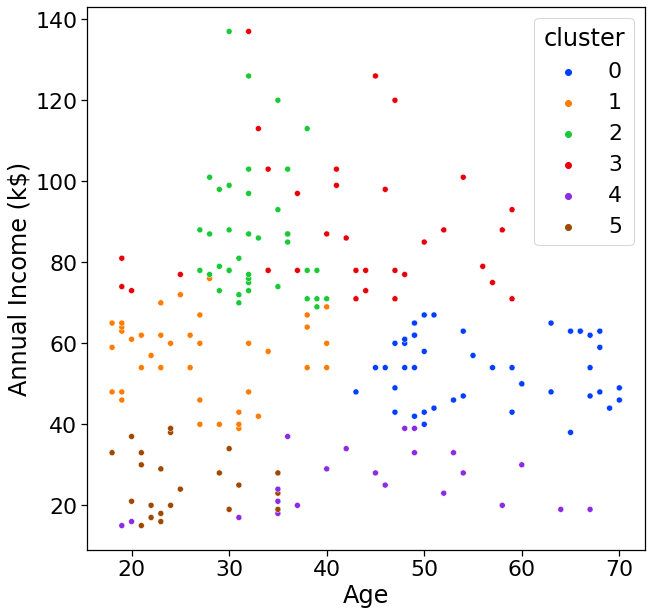

In [15]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Annual Income (k$)', 
    hue = 'cluster',
    data = df,
    palette = 'bright')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

Text(0, 0.5, 'Annual Income (k$)')

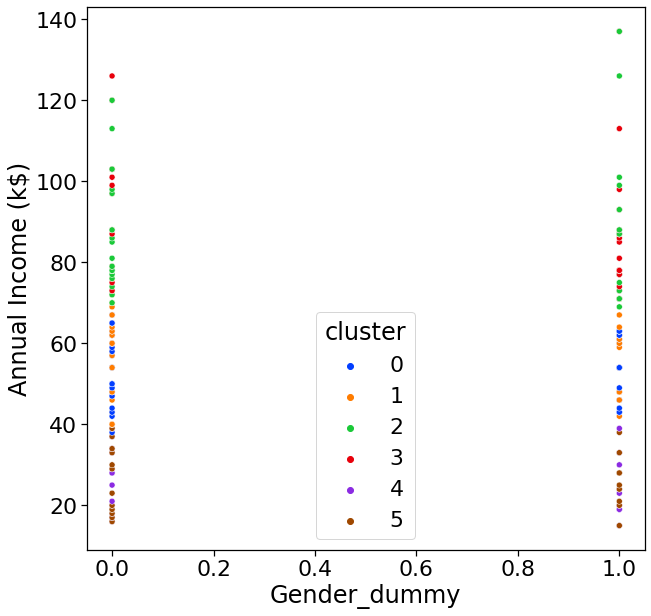

In [16]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Gender_dummy', 
    y = 'Annual Income (k$)', 
    hue = 'cluster',
    data = df,
    palette = 'bright')

plt.xlabel('Gender_dummy')
plt.ylabel('Annual Income (k$)')

Text(0, 0.5, 'Spending Score (1-100)')

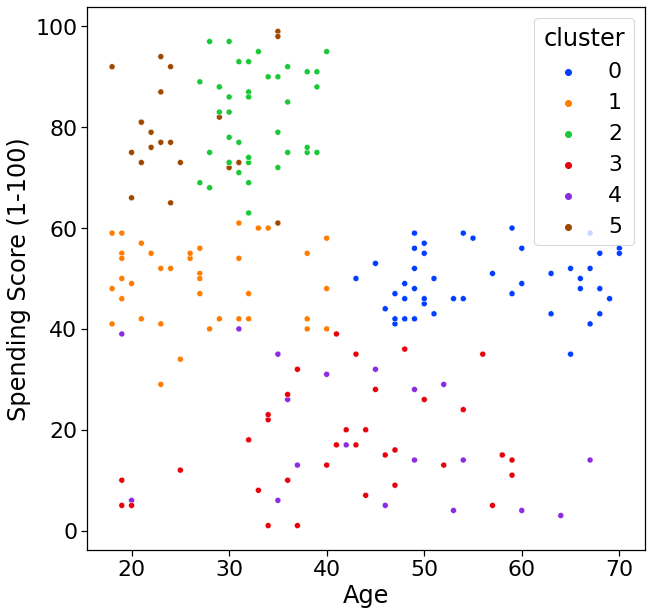

In [17]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'cluster',
    data = df,
    palette = 'bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

**Analisis Mall_Customers.csv**

Gunakan features `Age` dan `Spending Score`, scaling features tersebut dengan standard scaler, lalu bandingkan performa dan hasil clustering dengan metode K-means, agglomerative dan DB SCAN.  

*  Gunakan silhouette score untuk mencari parameter terbaik

In [18]:
df = pd.read_csv('data/Mall_Customers.csv')
df['Gender'] = np.where(df['Gender']=='Male',1,0)
df.drop(columns='CustomerID',inplace=True)

In [19]:
df_AgeSpending = df[['Age','Spending Score (1-100)']]
df_AgeSpending

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_AgeSpending)
x_scaled = pd.DataFrame(x_scaled, columns=['Age','Spending Score (1-100)'])
x_scaled

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


### KMeans

In [21]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(x_scaled) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(x_scaled, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis=1) for D in D_k] 
dist = [np.min(D, axis=1) for D in D_k] 
avgWithinSS = [sum(d)/x_scaled.shape[0] for d in dist]

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


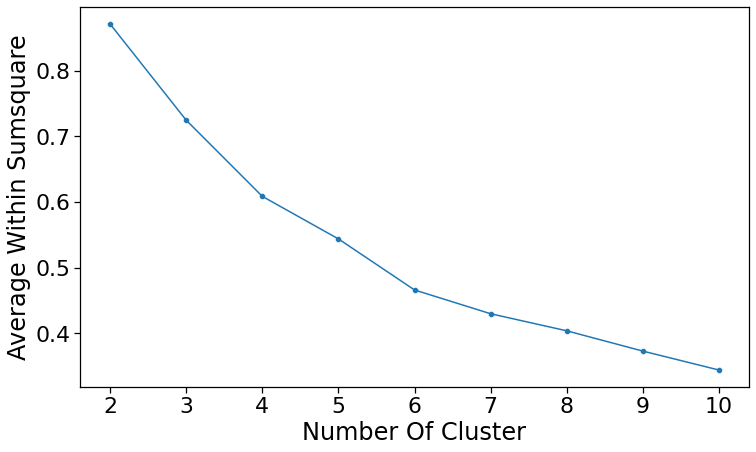

In [22]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_score = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    
    label = kmeans.labels_
    sil_score.append(silhouette_score(x_scaled, label, metric='euclidean'))

Text(0, 0.5, 'Silhouette Score')

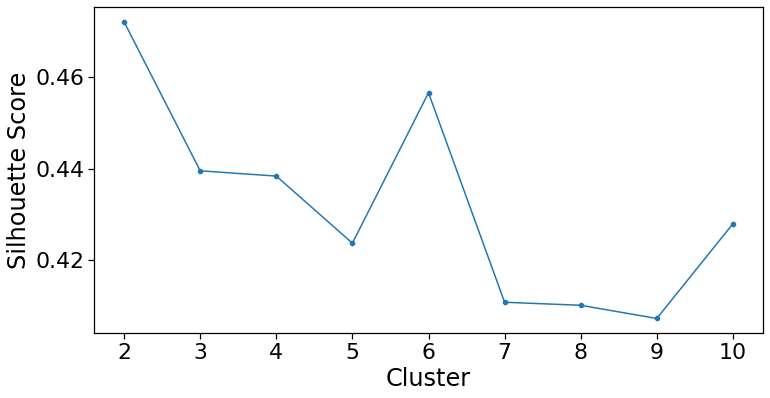

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=range(2,11), y=sil_score)
sns.lineplot(x=range(2,11),y=sil_score)

plt.xlabel("Cluster")
plt.ylabel("Silhouette Score")

**2 Cluster terbaik**

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_AgeSpending)

KMeans(n_clusters=2)

In [26]:
df['cluster'] = kmeans.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,1
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

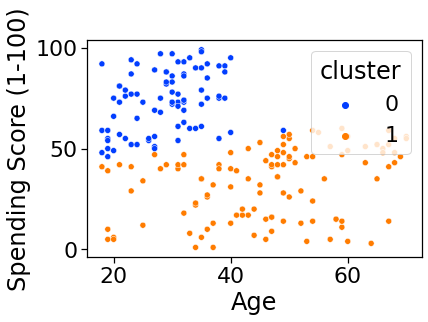

In [27]:
sns.scatterplot(
    df['Age'],
    df['Spending Score (1-100)'],
    hue=df['cluster'],
    palette='bright'
)

### Agglomerative 

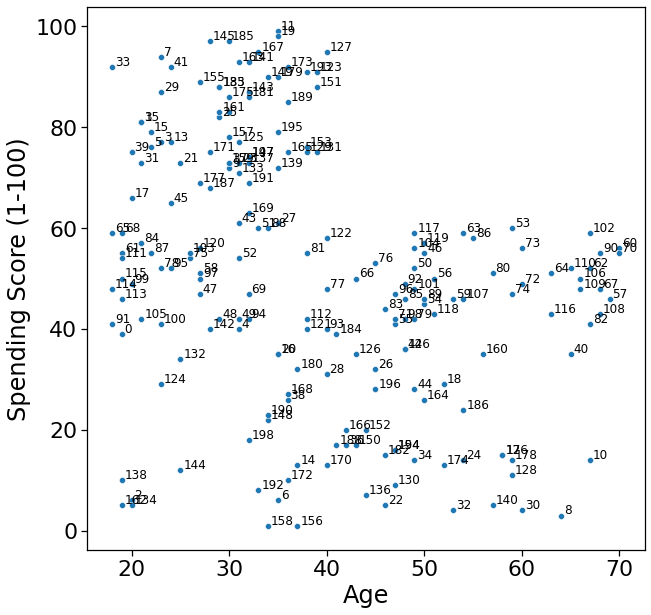

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

for i,txt in enumerate(range(0,df_AgeSpending.shape[0]-1)):
    plt.annotate(txt,(df['Age'][i]+0.3, df['Spending Score (1-100)'][i]+0.3), fontsize=12)

In [29]:
df_AgeSpending

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


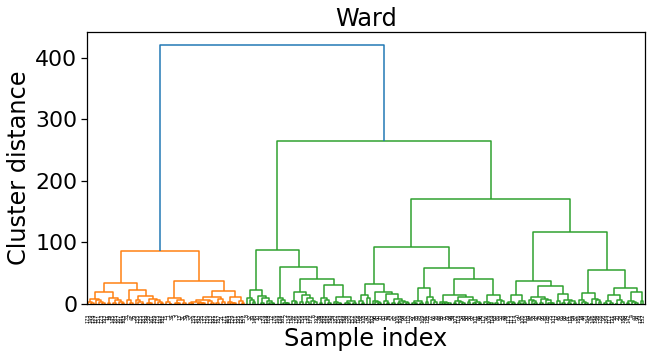

In [30]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

linkage_array = ward(df_AgeSpending)

plt.figure(figsize = (10,5))

dendrogram(linkage_array, 25)
# ax = plt.gca()
# bounds = ax.get_xbound()
# ax.plot(bounds, [350, 350], '--', c='k')
# ax.plot(bounds, [250, 250], '--', c='k')
# ax.text(bounds[1], 350, ' three clusters', va='center', fontdict={'size': 15})
# ax.text(bounds[1], 250, ' four clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

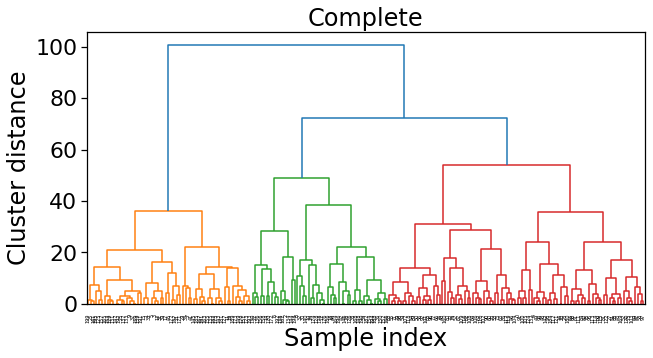

In [31]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

linkage_array = complete(df_AgeSpending)

plt.figure(figsize = (10,5))

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
# ax.plot(bounds, [350, 350], '--', c='k')
# ax.plot(bounds, [250, 250], '--', c='k')
# ax.text(bounds[1], 350, ' three clusters', va='center', fontdict={'size': 15})
# ax.text(bounds[1], 250, ' four clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

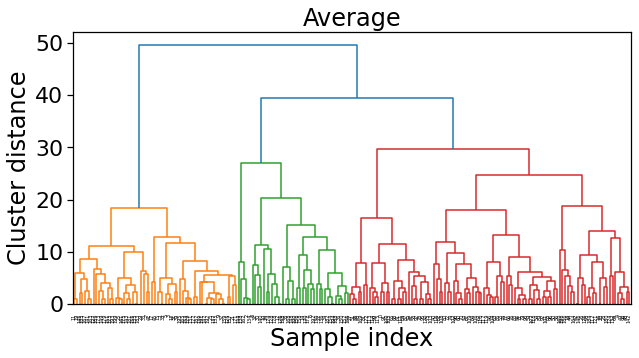

In [32]:
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

linkage_array = average(df_AgeSpending)

plt.figure(figsize = (10,5))

dendrogram(linkage_array, 25)
# ax = plt.gca()
# bounds = ax.get_xbound()
# ax.plot(bounds, [350, 350], '--', c='k')
# ax.plot(bounds, [250, 250], '--', c='k')
# ax.text(bounds[1], 350, ' three clusters', va='center', fontdict={'size': 15})
# ax.text(bounds[1], 250, ' four clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
ward_score = []
complete_score = []
average_score = []

for i in range(2,5):
    agg_ward = AgglomerativeClustering(n_clusters=i, linkage='ward')
    ward = agg_ward.fit_predict(x_scaled)
    agg_complete = AgglomerativeClustering(n_clusters=i, linkage='complete')
    complete = agg_complete.fit_predict(x_scaled)
    agg_average = AgglomerativeClustering(n_clusters=i, linkage='average')
    average = agg_average.fit_predict(x_scaled)
    
    ward_score.append(silhouette_score(x_scaled, ward))
    complete_score.append(silhouette_score(x_scaled, complete))
    average_score.append(silhouette_score(x_scaled, average))

In [34]:
df_compare_sil = pd.DataFrame(ward_score, index=range(2,5), columns=['ward'])
df_compare_sil['complete'] = complete_score
df_compare_sil['average'] = average_score
df_compare_sil.reset_index(inplace=True)
df_compare_sil

,index,ward,complete,average
0,2,0.414500,0.404133,0.251212
1,3,0.416641,0.407969,0.418943
2,4,0.389270,0.379721,0.412421


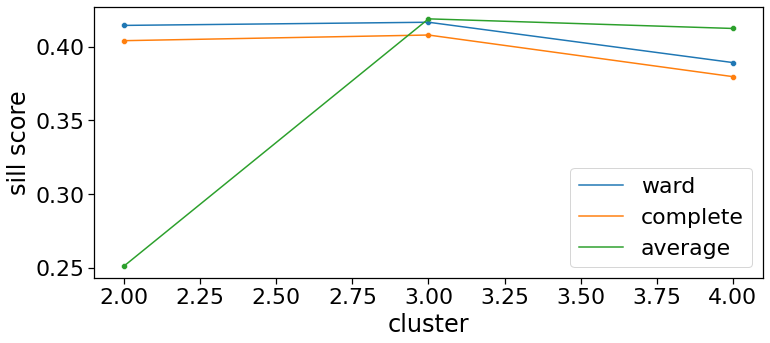

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_compare_sil, x='index',y='ward')
sns.lineplot(data=df_compare_sil, x='index',y='complete')
sns.lineplot(data=df_compare_sil, x='index',y='average')

sns.scatterplot(data=df_compare_sil, x='index',y='ward')
sns.scatterplot(data=df_compare_sil, x='index',y='complete')
sns.scatterplot(data=df_compare_sil, x='index',y='average')

plt.legend(['ward','complete','average'])

plt.xlabel('cluster')
plt.ylabel('sill score')
plt.show()

In [36]:
avg = []
for i in range(3):
    avg.append((df_compare_sil.iloc[i,1]+df_compare_sil.iloc[i,2]+df_compare_sil.iloc[i,3])/3)
df_compare_sil['avg'] = avg
df_compare_sil

,index,ward,complete,average,avg
0,2,0.414500,0.404133,0.251212,0.356615
1,3,0.416641,0.407969,0.418943,0.414518
2,4,0.389270,0.379721,0.412421,0.393804


In [37]:
from sklearn.cluster import AgglomerativeClustering
# Result Comparison

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['ward'] = agg_ward.fit_predict(x_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['complete'] = agg_complete.fit_predict(x_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['average'] = agg_average.fit_predict(x_scaled)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,ward,complete,average
0,1,19,15,39,1,1,0,2
1,1,21,15,81,0,2,2,2
2,0,20,16,6,1,1,0,1
3,0,23,16,77,0,2,2,2
4,0,31,17,40,1,1,0,2


In [38]:
print('silh score ward: ', silhouette_score(x_scaled, df['ward']))
print('silh score comp: ', silhouette_score(x_scaled, df['complete']))
print('silh score aver: ', silhouette_score(x_scaled, df['average']))

silh score ward:  0.41664148520394606
silh score comp:  0.40796901870628616
silh score aver:  0.41894341864426976


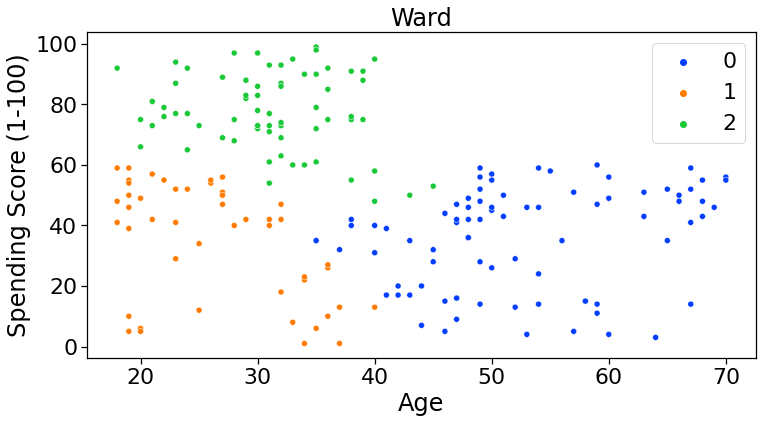

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='ward',
    palette='bright'
)
plt.title('Ward')
plt.legend(loc='upper right')

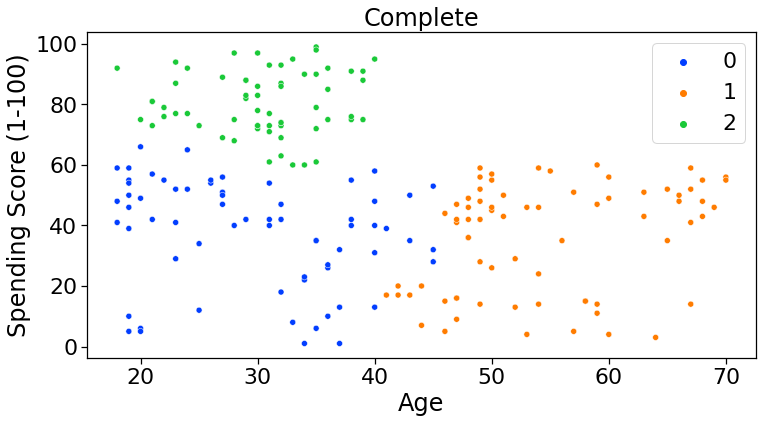

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='complete',
    palette='bright'
)
plt.title('Complete')
plt.legend(loc='upper right')

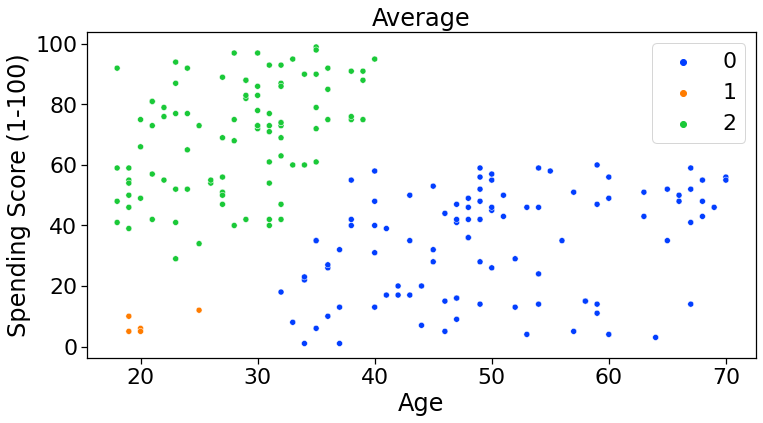

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Spending Score (1-100)',
    hue='average',
    palette='bright'
)
plt.title('Average')
plt.legend(loc='upper right')

### DBScan

In [42]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_AgeSpending)
x_scaled = pd.DataFrame(x_scaled, columns=['Age','Spending Score (1-100)'])
x_scaled

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


In [43]:
from sklearn.cluster import DBSCAN
# optimizing epsilon dan min_samples

for eps in [i/10 for i in range(1,6)]:
    for min_sample in range(4,8):
        print('\neps={}'.format(eps))
        print(f'min_sample={min_sample}')
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(x_scaled)
        silh = silhouette_score(x_scaled, labels)
        print(f'cluster present: {np.unique(labels)}')
        print(f'cluster size: {np.bincount(labels+1)}')
        print(f'silhoutte score: {silh}')


eps=0.1
min_sample=4
cluster present: [-1  0  1]
cluster size: [188   8   4]
silhoutte score: -0.4124562023343181

eps=0.1
min_sample=5
cluster present: [-1  0]
cluster size: [192   8]
silhoutte score: -0.1172020347991878

eps=0.1
min_sample=6
cluster present: [-1  0]
cluster size: [192   8]
silhoutte score: -0.1172020347991878

eps=0.1
min_sample=7
cluster present: [-1  0]
cluster size: [192   8]
silhoutte score: -0.1172020347991878

eps=0.2
min_sample=4
cluster present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
cluster size: [69  4  9  6 33  4  6 19  5 18 13  4  6  4]
silhoutte score: 0.08784364464505547

eps=0.2
min_sample=5
cluster present: [-1  0  1  2  3  4  5  6  7  8  9]
cluster size: [101   9  21   6  19   5   9   9  12   4   5]
silhoutte score: -0.03614408497663603

eps=0.2
min_sample=6
cluster present: [-1  0  1  2  3  4  5]
cluster size: [132   8  20  16   7   9   8]
silhoutte score: -0.11517918564675847

eps=0.2
min_sample=7
cluster present: [-1  0  1  2]
cluster size: 

In [44]:
# scaling 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_AgeSpending)

# fit dbscan
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters_dbs = dbscan.fit_predict(x_scaled)

print('cluster: \n',clusters_dbs)
# lihat cluster present yg gak ada (-) yg berarti tdk ada nois, lalu lihat sil score terbesar

cluster: 
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [45]:
df['cluster_dbs'] = clusters_dbs
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,ward,complete,average,cluster_dbs
0,1,19,15,39,1,1,0,2,0
1,1,21,15,81,0,2,2,2,0
2,0,20,16,6,1,1,0,1,1
3,0,23,16,77,0,2,2,2,0
4,0,31,17,40,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...
195,0,35,120,79,0,2,2,2,0
196,0,45,126,28,1,0,0,0,0
197,1,32,126,74,0,2,2,2,0
198,1,32,137,18,1,1,0,0,0


Text(0, 0.5, 'Spending Score (1-100)')

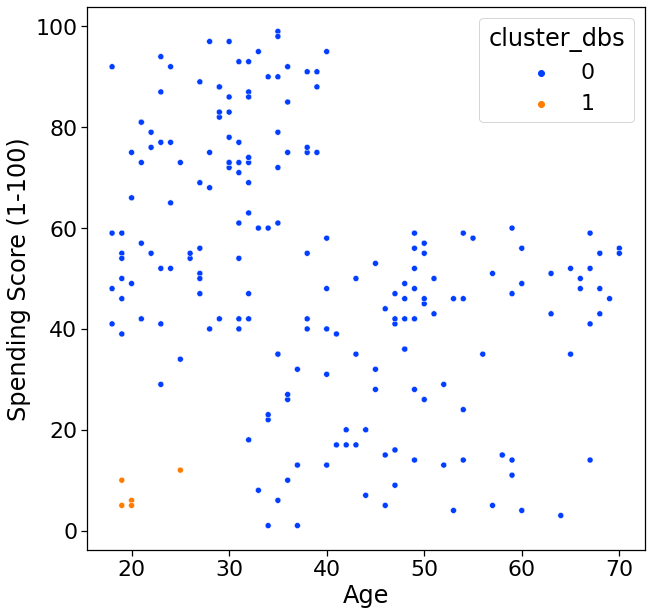

In [46]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score (1-100)', 
    hue = 'cluster_dbs',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')